In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
plt.style.use('seaborn-v0_8')

In [2]:
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["figure.figsize"] = [12,2]

p1 mean: 0.11776238700577292
p2 mean: 0.10525471558339476
45


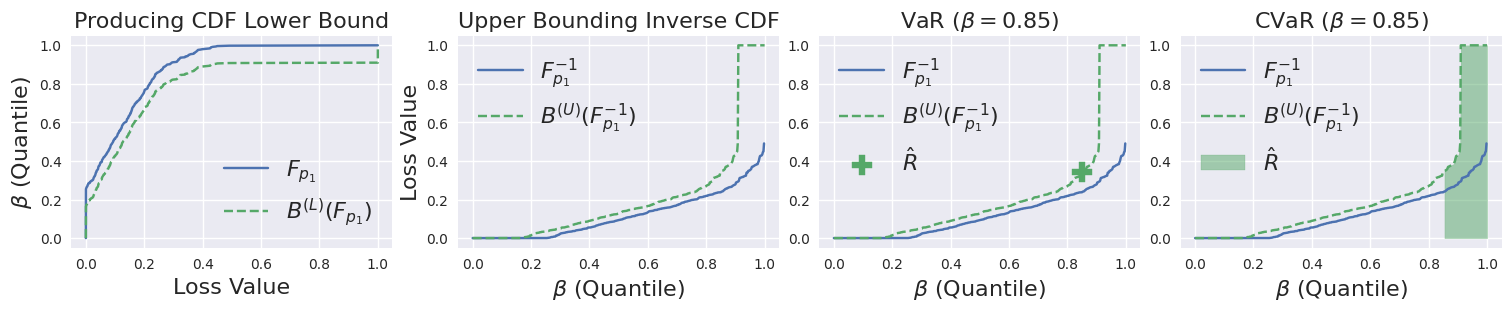

In [112]:
np.random.seed(0)

n_points = 500

mu1 = 0.1
sig1 = 0.145

mu2 = 0.1
sig2 = 1.55

p1_loss = np.sort(
    np.clip(
        np.random.normal(mu1, sig1, n_points),
        # np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = (np.arange(n_points)/n_points)

bound_size = 0.09

beta_var = 0.8
plt_idx = 425

bound_betas = np.array(list(betas-bound_size)+[1-bound_size, 1.0])
bound_beta_offset = np.sum(bound_betas < 0.0)
print(bound_beta_offset)

plt.rcParams["figure.figsize"] = [15,3]
fig, axs = plt.subplot_mosaic([['B', 'X','C', 'D']],
                              layout='constrained')



axs['B'].plot(list(p1_loss)+[1.0], list(betas)+[1.0], label=r"$F_{p_1}$", color=pal[0])
axs['B'].plot((list(p1_loss)+[1.0,1.0])[bound_beta_offset:], list(bound_betas)[bound_beta_offset:], "--", label=r"$B^{(L)}(F_{p_1})$", color=pal[1])

axs['X'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['X'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}(F^{-1}_{p_1})$", color=pal[1])

axs['C'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['C'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}(F^{-1}_{p_1})$", color=pal[1])
axs['C'].scatter(bound_betas[plt_idx+bound_beta_offset], (list(p1_loss)+[1.0,1.0])[plt_idx+bound_beta_offset], marker="P", s=200, color=pal[1], label=r"$\hat R$")

axs['D'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['D'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}(F^{-1}_{p_1})$", color=pal[1])
cvar_idx = 30
axs['D'].fill_between(bound_betas[-cvar_idx:], (list(p1_loss)+[1.0,1.0])[-cvar_idx:], np.zeros(cvar_idx), alpha=0.5, color=pal[1], label=r"$\hat R$")


all_axs = [axs[l] for l in ["B", "X", "C", "D"]]

for i, ax in enumerate(all_axs):
    
    # ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
    # ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)



axs['B'].set_xlabel(r"Loss Value", fontsize=16)
axs['B'].set_ylabel(r"$\beta$ (Quantile)", fontsize=16)
axs['B'].set_title(r"Producing CDF Lower Bound", fontsize=16)
axs['B'].legend(loc="lower right", fontsize=16)

axs['X'].set_xlabel(r"$\beta$ (Quantile)", fontsize=16)
axs['X'].set_ylabel(r"Loss Value", fontsize=16)
axs['X'].set_title(r"Upper Bounding Inverse CDF", fontsize=16)
axs['X'].legend(loc="upper left", fontsize=16)

axs['C'].set_xlabel(r"$\beta$ (Quantile)", fontsize=16)
# axs['C'].set_ylabel(r"Loss Value", fontsize=16)
axs['C'].set_title(r"VaR ($\beta=0.85$)", fontsize=16)
axs['C'].legend(loc="upper left", fontsize=16)

axs['D'].set_xlabel(r"$\beta$ (Quantile)", fontsize=16)
# axs['D'].set_ylabel(r"Loss Value", fontsize=16)
axs['D'].set_title(r"CVaR ($\beta=0.85$)", fontsize=16)
axs['D'].legend(loc="upper left", fontsize=16)

plt.savefig("../plots/figures/figure_3.png", bbox_inches="tight")
plt.show()

p1 mean: 0.30093881038383713
p2 mean: 0.37529095874209395
249
25
-0.000758557309782748 0.17732011841085565
[0.1057767940168535, 0.040810919404974985, 0.21813103781583063, 0.10653535132663625, 0.17732011841085565] ['#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']


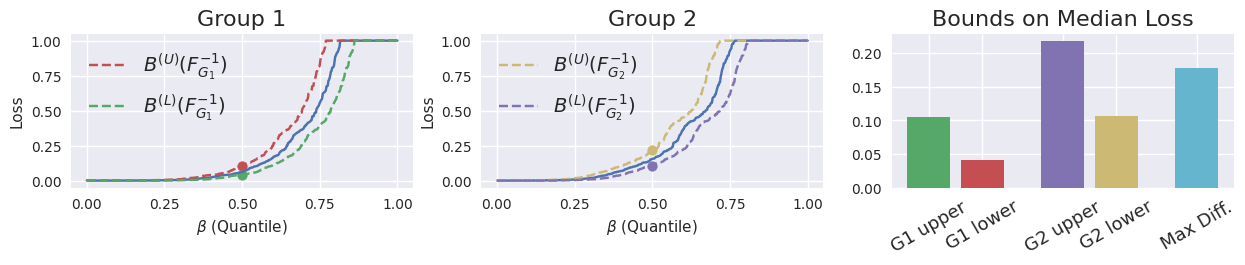

In [115]:
np.random.seed(0)

n_points = 500

mu1 = 0.2
sig1 = 3

mu2 = 0.25
sig2 = 4.5

plt.rcParams["figure.figsize"] = [15,2]

p1_loss = np.sort(
    np.clip(
        # np.random.normal(mu1, sig1, n_points),
        np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = ((np.arange(n_points)+1)/n_points)

bound_size = 0.05

beta_var = 0.5
beta_var_idx = list(betas).index(beta_var)
print(beta_var_idx)

upper_bound_betas = np.clip(np.array(list(betas-bound_size)+[1-bound_size, 1.0]), 0, 1)[-n_points:]
lower_bound_betas = np.clip(np.array([0.0, bound_size]+list(betas+bound_size)), 0, 1)[:n_points]
bound_beta_offset = np.sum(upper_bound_betas == 0.0)+2
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3)

p1_lower_bound = p1_loss[beta_var_idx-bound_beta_offset]
p1_upper_bound = p1_loss[beta_var_idx+bound_beta_offset]
axs[0].plot(betas, p1_loss, color=pal[0])
axs[0].plot(upper_bound_betas, p1_loss,  "--", color=pal[2], label=r"$B^{(U)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_upper_bound, color=pal[2])
axs[0].plot(lower_bound_betas, p1_loss, "--", color=pal[1], label=r"$B^{(L)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_lower_bound, color=pal[1])

p2_lower_bound = p2_loss[beta_var_idx-bound_beta_offset]
p2_upper_bound = p2_loss[beta_var_idx+bound_beta_offset]
axs[1].plot(betas, p2_loss, color=pal[0])
axs[1].plot(upper_bound_betas, p2_loss,  "--", color=pal[4], label=r"$B^{(U)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_upper_bound, color=pal[4])
axs[1].plot(lower_bound_betas, p2_loss, "--", color=pal[3], label=r"$B^{(L)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_lower_bound, color=pal[3])

for ax in axs[:2]:
    ax.set_xlabel(r"$\beta$ (Quantile)")
    ax.set_ylabel(r"Loss")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])

axs[0].legend(fontsize=14)
axs[0].set_title("Group 1", fontsize=16)

axs[1].legend(fontsize=14)
axs[1].set_title("Group 2", fontsize=16)

max_diff =  max(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

print(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

bar_vals = [
    p1_loss[beta_var_idx+bound_beta_offset],
    p1_loss[beta_var_idx-bound_beta_offset],
    p2_loss[beta_var_idx+bound_beta_offset],
    p2_loss[beta_var_idx-bound_beta_offset],
    max_diff
]
bar_labels = [
    "G1 upper",
    "G1 lower",
    "G2 upper",
    "G2 lower",
    "Max Diff."
]
bar_cols = [pal[k] for k in range(1,len(bar_vals)+1)]
bar_xpos = [1,2,3.5,4.5,6]

print(bar_vals, bar_cols)
axs[2].bar(bar_xpos,bar_vals, color=bar_cols)
axs[2].set_xticks(bar_xpos, bar_labels, rotation=30, fontsize=13)
axs[2].set_title("Bounds on Median Loss", fontsize=16)

# axs[2].plot([2.75, 2.75], [p1_lower_bound, p2_upper_bound], "--", lw=2, color=bar_cols[-1], label="Bound on Median Difference")
# axs[2].legend(loc="lower left", frameon=True)

plt.savefig("../plots/figures/figure_4.png", bbox_inches="tight")
plt.show()

p1 mean: 0.44209689887931863
p2 mean: 0.5083749859804623
249
25
0.06498949424517292 0.36835053769669945


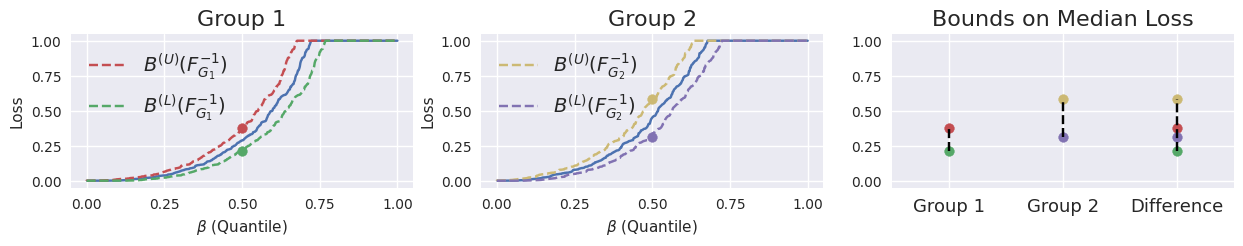

In [148]:
np.random.seed(0)

n_points = 500

mu1 = 0.35
sig1 = 3

mu2 = 0.4
sig2 = 3

plt.rcParams["figure.figsize"] = [15,2]

p1_loss = np.sort(
    np.clip(
        # np.random.normal(mu1, sig1, n_points),
        np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = ((np.arange(n_points)+1)/n_points)

bound_size = 0.05

beta_var = 0.5
beta_var_idx = list(betas).index(beta_var)
print(beta_var_idx)

upper_bound_betas = np.clip(np.array(list(betas-bound_size)+[1-bound_size, 1.0]), 0, 1)[-n_points:]
lower_bound_betas = np.clip(np.array([0.0, bound_size]+list(betas+bound_size)), 0, 1)[:n_points]
bound_beta_offset = np.sum(upper_bound_betas == 0.0)+2
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3)

p1_lower_bound = p1_loss[beta_var_idx-bound_beta_offset]
p1_upper_bound = p1_loss[beta_var_idx+bound_beta_offset]
axs[0].plot(betas, p1_loss, color=pal[0])
axs[0].plot(upper_bound_betas, p1_loss,  "--", color=pal[2], label=r"$B^{(U)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_upper_bound, color=pal[2])
axs[0].plot(lower_bound_betas, p1_loss, "--", color=pal[1], label=r"$B^{(L)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_lower_bound, color=pal[1])

p2_lower_bound = p2_loss[beta_var_idx-bound_beta_offset]
p2_upper_bound = p2_loss[beta_var_idx+bound_beta_offset]
axs[1].plot(betas, p2_loss, color=pal[0])
axs[1].plot(upper_bound_betas, p2_loss,  "--", color=pal[4], label=r"$B^{(U)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_upper_bound, color=pal[4])
axs[1].plot(lower_bound_betas, p2_loss, "--", color=pal[3], label=r"$B^{(L)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_lower_bound, color=pal[3])

for ax in axs[:2]:
    ax.set_xlabel(r"$\beta$ (Quantile)")
    ax.set_ylabel(r"Loss")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])

axs[0].legend(fontsize=14)
axs[0].set_title("Group 1", fontsize=16)

axs[1].legend(fontsize=14)
axs[1].set_title("Group 2", fontsize=16)

max_diff =  max(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

print(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

axs[2].plot([1,1], [p1_lower_bound, p1_upper_bound], "--", color="k")
axs[2].scatter([1], [p1_lower_bound], color=pal[1])
axs[2].scatter([1], [p1_upper_bound], color=pal[2])

axs[2].plot([1.1,1.1], [p2_lower_bound, p2_upper_bound], "--", color="k")
axs[2].scatter([1.1], [p2_lower_bound], color=pal[3])
axs[2].scatter([1.1], [p2_upper_bound], color=pal[4])

axs[2].plot([1.2,1.2], [p1_lower_bound, p2_upper_bound], "--", color="k")
axs[2].scatter([1.2], [p1_lower_bound], color=pal[1])
axs[2].scatter([1.2], [p1_upper_bound], color=pal[2])
axs[2].scatter([1.2], [p2_lower_bound], color=pal[3])
axs[2].scatter([1.2], [p2_upper_bound], color=pal[4])


axs[2].set_xlim(0.95, 1.25)
axs[2].set_xticks([1,1.1,1.2], labels=["Group 1", "Group 2", "Difference"], fontsize=13)
axs[2].set_ylim(-0.05, 1.05)
# bar_vals = [
#     p1_loss[beta_var_idx+bound_beta_offset],
#     p1_loss[beta_var_idx-bound_beta_offset],
#     p2_loss[beta_var_idx+bound_beta_offset],
#     p2_loss[beta_var_idx-bound_beta_offset],
#     max_diff
# ]
# bar_labels = [
#     "G1 upper",
#     "G1 lower",
#     "G2 upper",
#     "G2 lower",
#     "Max Diff."
# ]
# bar_cols = [pal[k] for k in range(1,len(bar_vals)+1)]
# bar_xpos = [1,2,3.5,4.5,6]

# print(bar_vals, bar_cols)
# axs[2].bar(bar_xpos,bar_vals, color=bar_cols)
# axs[2].set_xticks(bar_xpos, bar_labels, rotation=30, fontsize=13)
axs[2].set_title("Bounds on Median Loss", fontsize=16)

# axs[2].plot([2.75, 2.75], [p1_lower_bound, p2_upper_bound], "--", lw=2, color=bar_cols[-1], label="Bound on Median Difference")
# axs[2].legend(loc="lower left", frameon=True)

# plt.savefig("../plots/figures/figure_4.png", bbox_inches="tight")
plt.show()

p1 mean: 0.11776238700577292
p2 mean: 0.12645014592935971
45


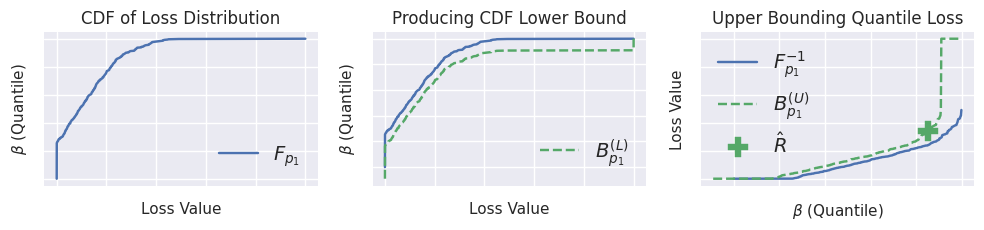

In [4]:
np.random.seed(0)

n_points = 500

mu1 = 0.1
sig1 = 0.145

mu2 = 0.1
sig2 = 1.55

p1_loss = np.sort(
    np.clip(
        np.random.normal(mu1, sig1, n_points),
        # np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = (np.arange(n_points)/n_points)

bound_size = 0.09

beta_var = 0.8
plt_idx = 425

bound_betas = np.array(list(betas-bound_size)+[1-bound_size, 1.0])
bound_beta_offset = np.sum(bound_betas < 0.0)
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3)

axs[0].plot(list(p1_loss)+[1.0], list(betas)+[1.0], label=r"$F_{p_1}$", color=pal[0])

axs[1].plot(list(p1_loss)+[1.0], list(betas)+[1.0], color=pal[0])
axs[1].plot(list(p1_loss)+[1.0,1.0], list(bound_betas), "--", label=r"$B^{(L)}_{p_1}$", color=pal[1])

axs[2].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs[2].plot(bound_betas, list(p1_loss)+[1.0,1.0], "--", label=r"$B^{(U)}_{p_1}$", color=pal[1])

# axs[2].scatter(betas[plt_idx], p1_loss[plt_idx], marker="P", s=200, color=pal[0]
axs[2].scatter(bound_betas[plt_idx+bound_beta_offset], (list(p1_loss)+[1.0,1.0])[plt_idx+bound_beta_offset], marker="P", s=200, color=pal[1], label=r"$\hat R$")

for i, ax in enumerate(axs):
    
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])

axs[0].set_xlabel(r"Loss Value")
axs[0].set_ylabel(r"$\beta$ (Quantile)")
axs[0].set_title(r"CDF of Loss Distribution")
axs[0].legend(loc="lower right", fontsize=14)

axs[1].set_xlabel(r"Loss Value")
axs[1].set_ylabel(r"$\beta$ (Quantile)")
axs[1].set_title(r"Producing CDF Lower Bound")
axs[1].legend(loc="lower right", fontsize=14)

axs[2].set_xlabel(r"$\beta$ (Quantile)")
axs[2].set_ylabel(r"Loss Value")
axs[2].set_title(r"Upper Bounding Quantile Loss")
axs[2].legend(loc="upper left", fontsize=14)


plt.savefig("../plots/figures/figure_3.png", dpi=1200, bbox_inches="tight")
plt.show()

In [ ]:
np.random.seed(0)

n_points = 500

mu1 = 0.1
sig1 = 0.145

mu2 = 0.1
sig2 = 1.55

p1_loss = np.sort(
    np.clip(
        np.random.normal(mu1, sig1, n_points),
        # np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = (np.arange(n_points)/n_points)

bound_size = 0.09

beta_var = 0.8
plt_idx = 425

bound_betas = np.array(list(betas-bound_size)+[1-bound_size, 1.0])
bound_beta_offset = np.sum(bound_betas < 0.0)
print(bound_beta_offset)

plt.rcParams["figure.figsize"] = [12,6]
fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B', 'X', 'X'],['C', 'C', 'D', 'D', 'E', 'E']],
                              layout='constrained')

axs['A'].plot(list(p1_loss)+[1.0], list(betas)+[1.0], label=r"$F_{p_1}$", color=pal[0])

axs['B'].plot(list(p1_loss)+[1.0], list(betas)+[1.0], color=pal[0])
axs['B'].plot((list(p1_loss)+[1.0,1.0])[bound_beta_offset:], list(bound_betas)[bound_beta_offset:], "--", label=r"$B^{(L)}_{p_1}$", color=pal[1])

axs['X'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['X'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}_{p_1}$", color=pal[1])

axs['C'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['C'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}_{p_1}$", color=pal[1])
axs['C'].scatter(bound_betas[plt_idx+bound_beta_offset], (list(p1_loss)+[1.0,1.0])[plt_idx+bound_beta_offset], marker="P", s=200, color=pal[1], label=r"$\hat R$")

axs['D'].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs['D'].plot(bound_betas[bound_beta_offset:], (list(p1_loss)+[1.0,1.0])[bound_beta_offset:], "--", label=r"$B^{(U)}_{p_1}$", color=pal[1])
cvar_idx = 30
axs['D'].fill_between(bound_betas[-cvar_idx:], (list(p1_loss)+[1.0,1.0])[-cvar_idx:], np.zeros(cvar_idx), alpha=0.5, color=pal[1], label=r"$\hat R$")

axs['E'].plot([0,1], [0,1], label="Line of Equality")
lorenz = np.arange(101)/100
eps = 0.05

axs['E'].plot(lorenz, lorenz**2.5, label="Lorenz Curve", color=pal[1])
axs['E'].plot(lorenz, np.clip(lorenz**2.5+eps, 0, 1), "--", color=pal[3], label=r"$B^{(U)}_{p_1}$")
axs['E'].plot(lorenz, np.clip(lorenz**2.5-eps, 0, 1), "--", color=pal[4], label=r"$B^{(L)}_{p_1}$")

all_axs = [axs[l] for l in ["A", "B", "C", "D", "E", "X"]]

for i, ax in enumerate(all_axs):
    
    # ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
    # ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

axs['A'].set_xlabel(r"Loss Value")
axs['A'].set_ylabel(r"$\beta$ (Quantile)")
axs['A'].set_title(r"CDF of Loss Distribution")
axs['A'].legend(loc="lower right", fontsize=14)

axs['B'].set_xlabel(r"Loss Value")
axs['B'].set_ylabel(r"$\beta$ (Quantile)")
axs['B'].set_title(r"Producing CDF Lower Bound")
axs['B'].legend(loc="lower right", fontsize=14)

axs['X'].set_xlabel(r"$\beta$ (Quantile)")
axs['X'].set_ylabel(r"Loss Value")
axs['X'].set_title(r"Upper Bounding Inverse CDF")
axs['X'].legend(loc="upper left", fontsize=14)

axs['C'].set_xlabel(r"$\beta$ (Quantile)")
axs['C'].set_ylabel(r"Loss Value")
axs['C'].set_title(r"VaR ($\beta=0.85$)")
axs['C'].legend(loc="upper left", fontsize=14)

axs['D'].set_xlabel(r"$\beta$ (Quantile)")
axs['D'].set_ylabel(r"Loss Value")
axs['D'].set_title(r"CVaR ($\beta=0.85$)")
axs['D'].legend(loc="upper left", fontsize=14)

axs['E'].set_title(r"Gini Co-efficient")
axs['E'].legend(loc="upper left", fontsize=14)
axs['E'].text(0.5, 0.4, "A", fontsize=14, fontweight="bold")
axs['E'].text(0.75, 0.2, "B", fontsize=14, fontweight="bold")

axs['E'].set_xlim(0.0,1.0)
axs['E'].set_ylim(0.0,1.0)

axs['E'].set_xlabel(r"$\beta$ (Quantile of Population)")
axs['E'].set_ylabel("Cumulative Loss")


plt.savefig("../plots/figures/figure_3.png", bbox_inches="tight")
plt.show()

p1 mean: 0.11776238700577292
p2 mean: 0.10657705317668466
45


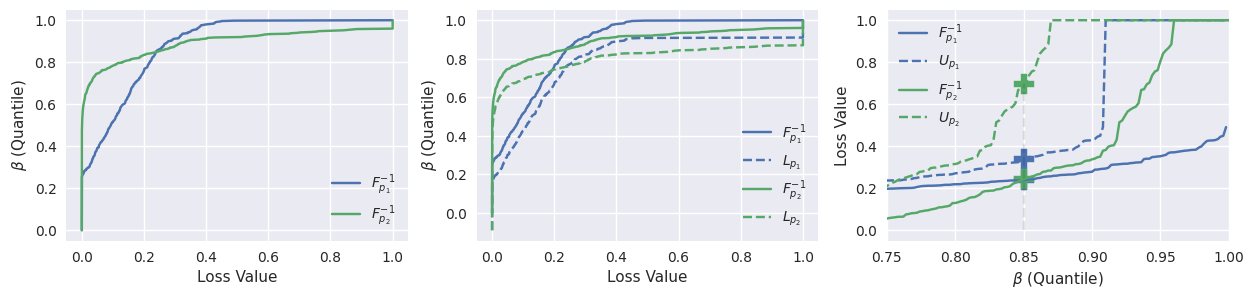

In [131]:
np.random.seed(0)

n_points = 500

mu1 = 0.1
sig1 = 0.145

mu2 = 0.1
sig2 = 1.55

p1_loss = np.sort(
    np.clip(
        np.random.normal(mu1, sig1, n_points),
        # np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = (np.arange(n_points)/n_points)

bound_size = 0.09

beta_var = 0.85
plt_idx = 425

bound_betas = np.array(list(betas-bound_size)+[1-bound_size, 1.0])
bound_beta_offset = np.sum(bound_betas < 0.0)
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3)

axs[0].plot(list(p1_loss)+[1.0], list(betas)+[1.0], label=r"$F^{-1}_{p_1}$", color=pal[0])
axs[0].plot(p2_loss, betas, label=r"$F^{-1}_{p_2}$", color=pal[1])

axs[1].plot(list(p1_loss)+[1.0], list(betas)+[1.0], label=r"$F^{-1}_{p_1}$", color=pal[0])
axs[1].plot(list(p1_loss)+[1.0,1.0], list(bound_betas), "--", label=r"$L_{p_1}$", color=pal[0])
axs[1].plot(p2_loss, betas, label=r"$F^{-1}_{p_2}$", color=pal[1])
axs[1].plot(list(p2_loss)+[1.0,1.0], bound_betas, "--", label=r"$L_{p_2}$", color=pal[1])

axs[2].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
axs[2].plot(bound_betas, list(p1_loss)+[1.0,1.0], "--", label=r"$U_{p_1}$", color=pal[0])
axs[2].plot(betas, p2_loss, label=r"$F^{-1}_{p_2}$", color=pal[1])
axs[2].plot(bound_betas, list(p2_loss)+[1.0,1.0], "--", label=r"$U_{p_2}$", color=pal[1])

# axs[3].plot(betas, p1_loss, label=r"$F^{-1}_{p_1}$", color=pal[0])
# axs[3].plot(bound_betas, list(p1_loss)+[1.0,1.0], "--", label=r"$U_{p_1}$", color=pal[0])
# axs[3].plot(betas, p2_loss, label=r"$F^{-1}_{p_2}$", color=pal[1])
# axs[3].plot(bound_betas, list(p2_loss)+[1.0,1.0], "--", label=r"$U_{p_2}$", color=pal[1])

axs[2].plot([betas[plt_idx], betas[plt_idx]], [0.0, (list(p2_loss)+[1.0,1.0])[plt_idx+bound_beta_offset]], "--", color="k", alpha=0.1)

for i, ax in enumerate(axs):

    ax.legend()

    if i > 1:
        ax.scatter(betas[plt_idx], p1_loss[plt_idx], marker="P", s=200, color=pal[0])
        ax.scatter(bound_betas[plt_idx+bound_beta_offset], (list(p1_loss)+[1.0,1.0])[plt_idx+bound_beta_offset], marker="P", s=200, color=pal[0])
        ax.scatter(betas[plt_idx], p2_loss[plt_idx], marker="P", s=200, color=pal[1])
        ax.scatter(bound_betas[plt_idx+bound_beta_offset], (list(p2_loss)+[1.0,1.0])[plt_idx+bound_beta_offset], marker="P", s=200, color=pal[1])

axs[0].set_xlabel(r"Loss Value")
axs[0].set_ylabel(r"$\beta$ (Quantile)")

axs[1].set_xlabel(r"Loss Value")
axs[1].set_ylabel(r"$\beta$ (Quantile)")

axs[2].set_xlabel(r"$\beta$ (Quantile)")
axs[2].set_ylabel(r"Loss Value")
axs[2].set_xlim(0.75, 1.0)

# axs[3].set_xlabel(r"$\beta$ (Quantile)")
# axs[3].set_ylabel(r"Loss Value")
# axs[3].set_xlim(0.75, 1.0)

plt.show()